In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Create a simple dataset (house sizes in sq ft and prices in $1000s)
# This simulates collecting data from multiple house sales
sizes = np.array([750, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1400, 1500, 1600])
prices = np.array([150, 160, 165, 180, 185, 195, 210, 240, 255, 275, 290, 310])

sizes
prices

array([ 750,  800,  850,  900,  950, 1000, 1100, 1200, 1300, 1400, 1500,
       1600])

In [4]:
# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    'size': sizes,
    'price': prices
})

data

,size,price
0,750,150
1,800,160
2,850,165
3,900,180
4,950,185
5,1000,195
6,1100,210
7,1200,240
8,1300,255
9,1400,275


In [5]:
print(data.head())

   size  price
0   750    150
1   800    160
2   850    165
3   900    180
4   950    185


In [6]:
# Get basic statistics
print(data.describe())

              size       price
count    12.000000   12.000000
mean   1112.500000  217.916667
std     285.342697   54.500139
min     750.000000  150.000000
25%     887.500000  176.250000
50%    1050.000000  202.500000
75%    1325.000000  260.000000
max    1600.000000  310.000000


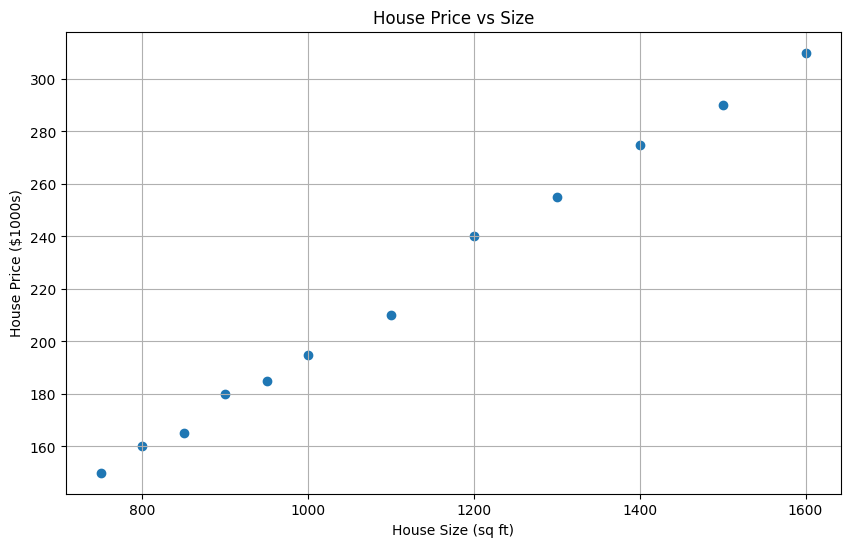

In [7]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['size'], data['price'])
plt.title('House Price vs Size')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($1000s)')
plt.grid(True)
plt.show()

In [8]:
# Look at correlation
print(f"Correlation between size and price: {data['size'].corr(data['price']):.2f}")

Correlation between size and price: 1.00


In [11]:
# For linear regression, we need to reshape our feature into a 2D array
X = data['size'].values.reshape(-1, 1)  # Features
y = data['price'].values  # Target

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")

Training data size: 9 samples
Testing data size: 3 samples


In [12]:
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Print the model parameters
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Formula: Price = {model.coef_[0]:.2f} × Size + {model.intercept_:.2f}")

Intercept: 4.64
Coefficient: 0.19
Formula: Price = 0.19 × Size + 4.64


In [13]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3.83
Root Mean Squared Error: 1.96
R² Score: 1.00


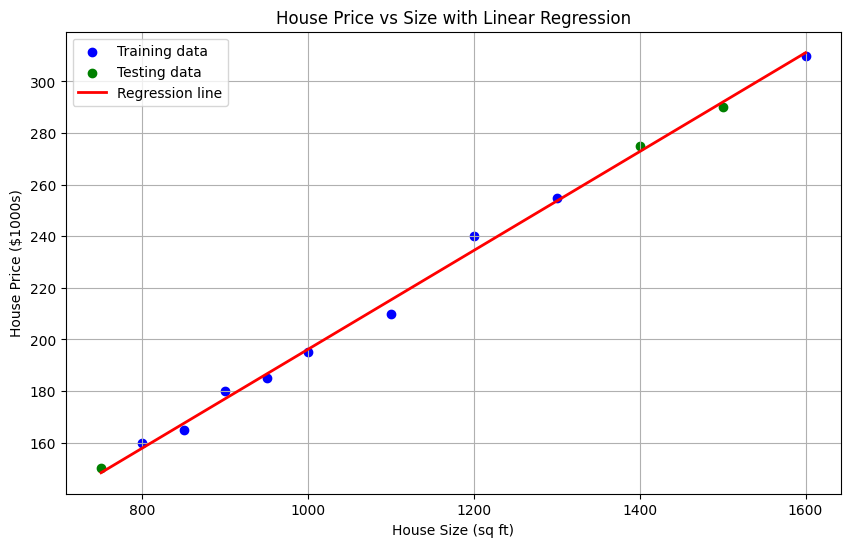

In [14]:
# Visualize the training data and the linear regression line
plt.figure(figsize=(10, 6))

# Plot the training data points
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the testing data points
plt.scatter(X_test, y_test, color='green', label='Testing data')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')

plt.title('House Price vs Size with Linear Regression')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($1000s)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Predict the price of a 1250 sq ft house
new_house_size = np.array([[1250]])
predicted_price = model.predict(new_house_size)

print(f"A house with 1250 sq ft would cost approximately ${predicted_price[0]:.2f}k")

A house with 1250 sq ft would cost approximately $244.10k
